# Data Exploration

In [1]:
import os, random, cv2
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

datapath = 'data/chest_xray'

## Balancing

In [2]:
total_images = glob(os.path.join(datapath, '*/*/**.jpeg'), recursive=True)
print(f"Total number of images: {len(total_images)}")
print(f"Train normal: {len(glob(os.path.join(datapath, 'train/NORMAL/**.jpeg'), recursive=True))}")
pneumonia_train = glob(os.path.join(datapath, 'train/PNEUMONIA/**.jpeg'), recursive=True)
print(f"Train pneumonia: {len(pneumonia_train)}")
print(f"Train pneumonia virus: {len([x for x in pneumonia_train if 'virus' in x])}")
print(f"Train pneumonia bacteria: {len([x for x in pneumonia_train if 'bacteria' in x])}")
print(f"Test normal: {len(glob(os.path.join(datapath, 'test/*/**.jpeg'), recursive=True))}")
pneumonia_test = glob(os.path.join(datapath, 'test/PNEUMONIA/**.jpeg'), recursive=True)
print(f"Test pneumonia: {len(pneumonia_test)}")
print(f"Test pneumonia virus: {len([x for x in pneumonia_test if 'virus' in x])}")
print(f"Test pneumonia bacteria: {len([x for x in pneumonia_test if 'bacteria' in x])}")

Total number of images: 5840
Train normal: 1341
Train pneumonia: 3875
Train pneumonia virus: 1345
Train pneumonia bacteria: 2530
Test normal: 624
Test pneumonia: 390
Test pneumonia virus: 148
Test pneumonia bacteria: 242


## Image sizes

Text(0, 0.5, 'Width')

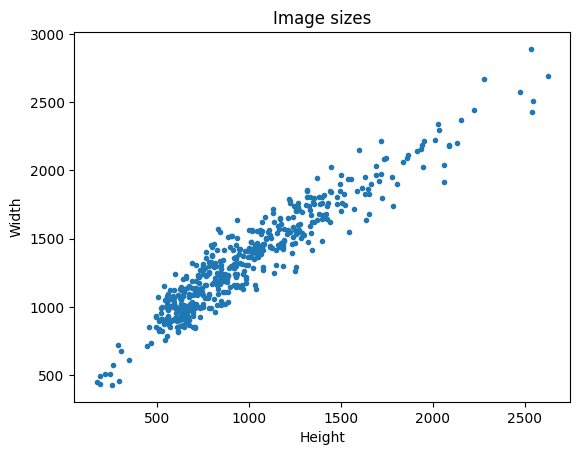

In [3]:
sample_size = 500
sample = random.sample(total_images, sample_size)
sizes = np.array([cv2.imread(img).shape for img in sample])
plt.plot(sizes[:, 0], sizes[:, 1], '.')
plt.title('Image sizes')
plt.xlabel('Height')
plt.ylabel('Width')

In [4]:
print(f"Target image size for inference: {sizes[:, 1].mean()} x {sizes[:, 0].mean()}")

Target image size for inference: 1335.288 x 980.11


## Variations

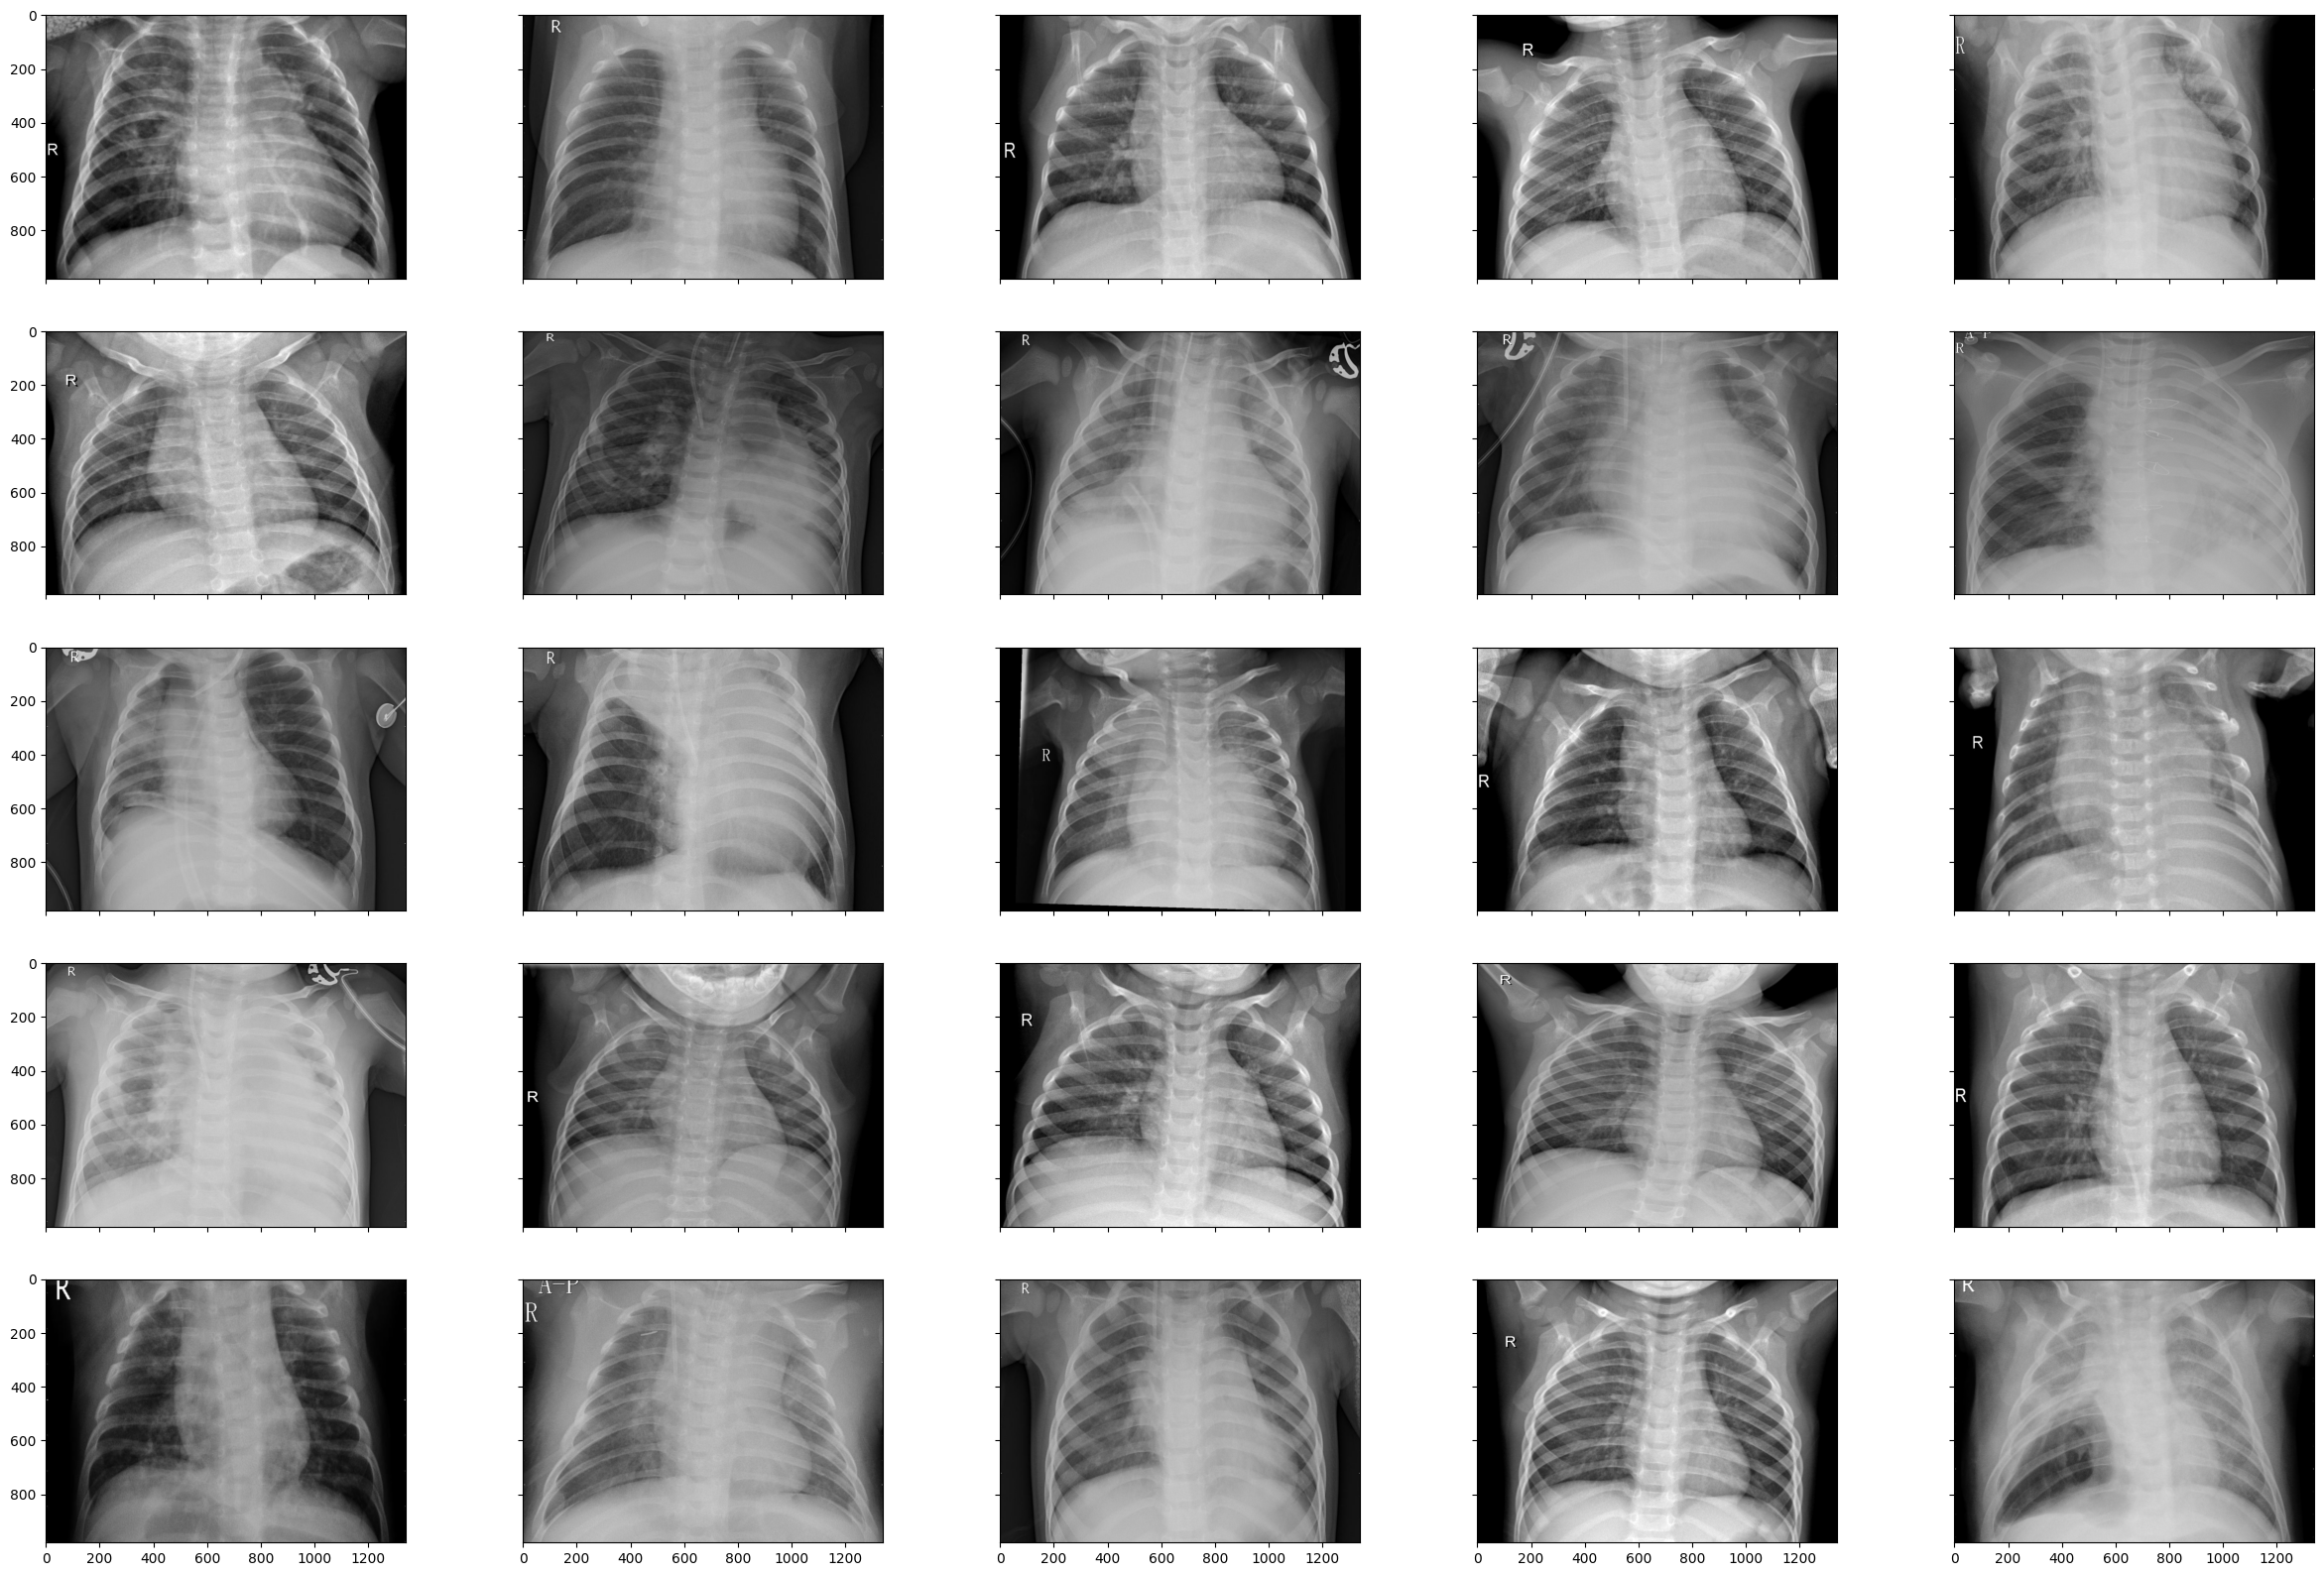

In [8]:
from itertools import product
fig, ax = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(30,20))
for x, y in product(range(5), range(5)):
    img = cv2.imread(random.choice(total_images))
    img = cv2.resize(img, (1340, 980))
    ax[x, y].imshow(img)

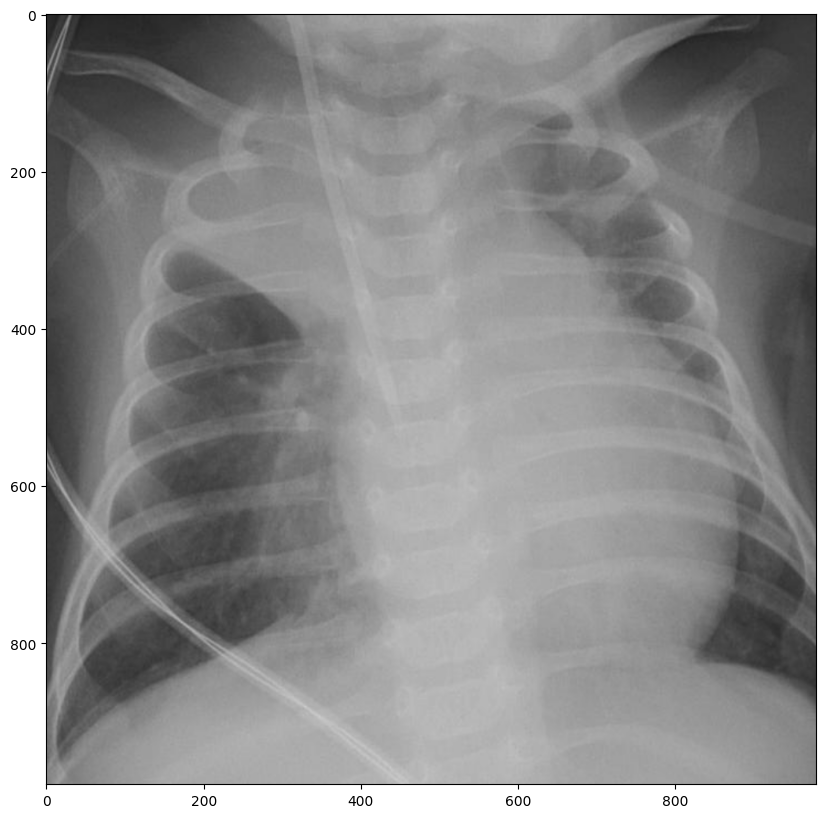

In [30]:
from itertools import product
img = cv2.imread(random.choice(total_images))
img = cv2.resize(img, (1340, 980))
plt.figure(figsize=(10,10))
size = (980, 980)
cuts = np.array([[(980-size[1])/2, 980 - (980-size[1])/2], [(1340-size[0])/2, 1340 - (1340-size[0])/2]], dtype=int)
plt.imshow(img)
plt.imshow(img[cuts[0, 0]:cuts[0, 1], cuts[1, 0]:cuts[1, 1]])

## Conclusions

* The dataset is unbalanced, with a lot more images of the pneumonia class than the normal class
* The mean of image sizes is 1340x980
* A center crop of 1024 x 768 would be a good size for the images
* Augmentation can be done using:
    * Rotation
    * Contrast
    * Brightness
* According to [The National Library of Medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8423280/#:~:text=X%2Dray%20imaging%20constitutes%20a,pneumonic%20from%20a%20healthy%20condition.), pneumonia can be identified by white blobs in the lungs. Therefore, those are the most important features to look for in the images
* Blur and reshaping can be very bad for the model, since the blobs can be lost